In [16]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%config InlineBackend.rc={'figure.figsize': (25,15)}

In [3]:
fifa = pd.read_csv('fifadata.csv')

In [4]:
fifa.head()



,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [5]:
#Maiores e menores ratings de players do fifa. 
fifa['Rating'].describe()


count    17588.000000
mean        66.166193
std          7.083012
min         45.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Rating, dtype: float64

In [6]:
#Jogador que possui maior precisão em cobrança de falta 
falta_acuracia=fifa['Freekick_Accuracy'].describe()
falta_acuracia['max']
fifa.loc[fifa['Freekick_Accuracy'] == falta_acuracia['max'] ]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
286,Andrea Pirlo,Italy,NaN,NaN,NYCFC,CM,21.0,07/06/2015,2023.0,82,...,65,92,93,84,76,5,5,1,4,2


In [7]:
#Melhor goleiro contando todas as habilidades destinadas a posição
somahabilidades=fifa['GK_Positioning'] + fifa['GK_Diving'] + fifa['GK_Kicking'] + fifa['GK_Handling'] + fifa['GK_Reflexes']
melhorgk=somahabilidades.argmax()


fifa.loc[melhorgk]




Name                     Manuel Neuer
Nationality                   Germany
National_Position                  GK
National_Kit                        1
Club                        FC Bayern
Club_Position                      GK
Club_Kit                            1
Club_Joining               07/01/2011
Contract_Expiry                  2021
Rating                             92
Height                         193 cm
Weight                          92 kg
Preffered_Foot                  Right
Birth_Date                 03/27/1986
Age                                31
Preffered_Position                 GK
Work_Rate             Medium / Medium
Weak_foot                           4
Skill_Moves                         1
Ball_Control                       48
Dribbling                          30
Marking                            10
Sliding_Tackle                     11
Standing_Tackle                    10
Aggression                         29
Reactions                          85
Attacking_Po

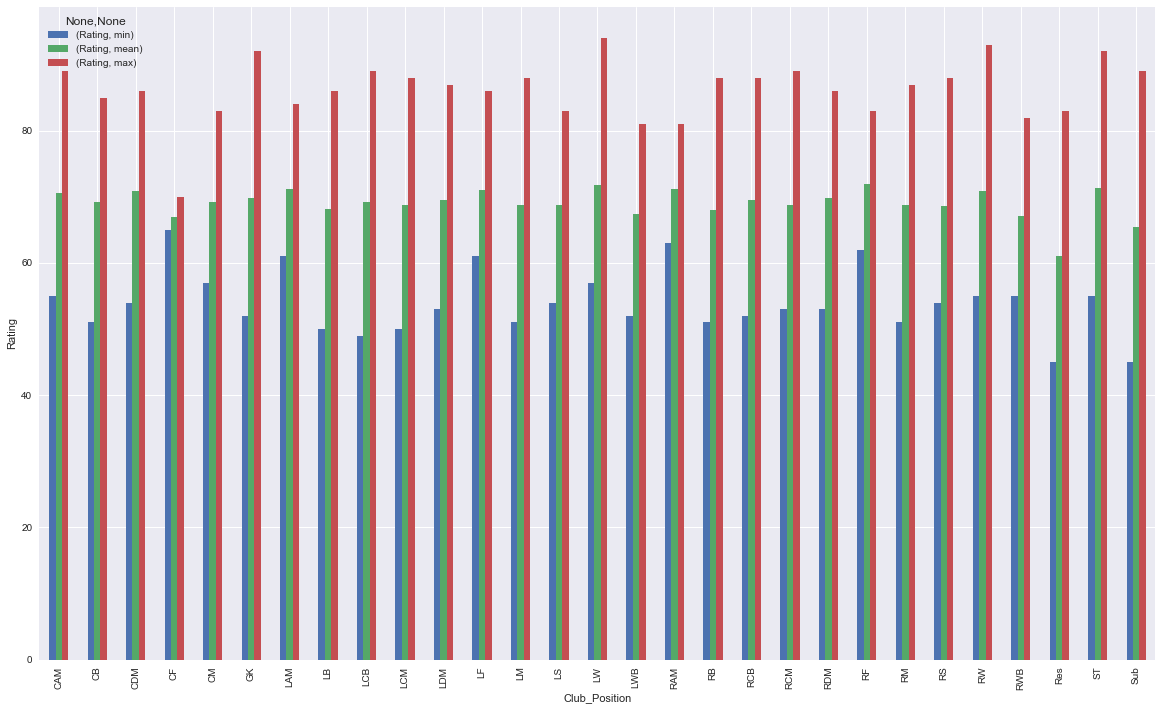

In [17]:
# Maior, media e menor rating por posição
rating=fifa.groupby('Club_Position').aggregate({'Rating':[min,np.mean,max]}).plot(kind='bar')
plt.ylabel('Rating')
  

#plt.savefig('grafico1.png')



In [9]:
fifa.groupby('Club_Position').aggregate({'Rating':[min,np.mean,max]})


Rating               
                 min       mean max
Club_Position                      
CAM               55  70.590476  89
CB                51  69.277108  85
CDM               54  70.848739  86
CF                65  67.000000  70
CM                57  69.164557  83
GK                52  69.825949  92
LAM               61  71.250000  84
LB                50  68.103825  86
LCB               49  69.164818  89
LCM               50  68.779661  88
LDM               53  69.492481  87
LF                61  71.083333  86
LM                51  68.818841  88
LS                54  68.809756  83
LW                57  71.842105  94
LWB               52  67.444444  81
RAM               63  71.222222  81
RB                51  68.056569  88
RCB               52  69.567141  88
RCM               53  68.747875  89
RDM               53  69.819549  86
RF                62  72.000000  83
RM                51  68.789855  87
RS                54  68.631068  88
RW                55  70.939850  93
RWB               55  67.088889  82
Res               45  61.063255  83
ST                55  71.269953  92
Sub               45  65.371730  89

In [10]:
#fifa.loc[1]print(fifa['Name']) print(fifa['Rating'])

fifa.groupby('Name').aggregate({'Rating':[max]})



,Rating
,max
Name,
A.J. DeLaGarza,69
Aapo Halme,57
Aaron Amadi-Holloway,57
Aaron Appindangoye,69
Aaron Barry,58
Aaron Bolger,49
Aaron Calver,58
Aaron Chapman,58


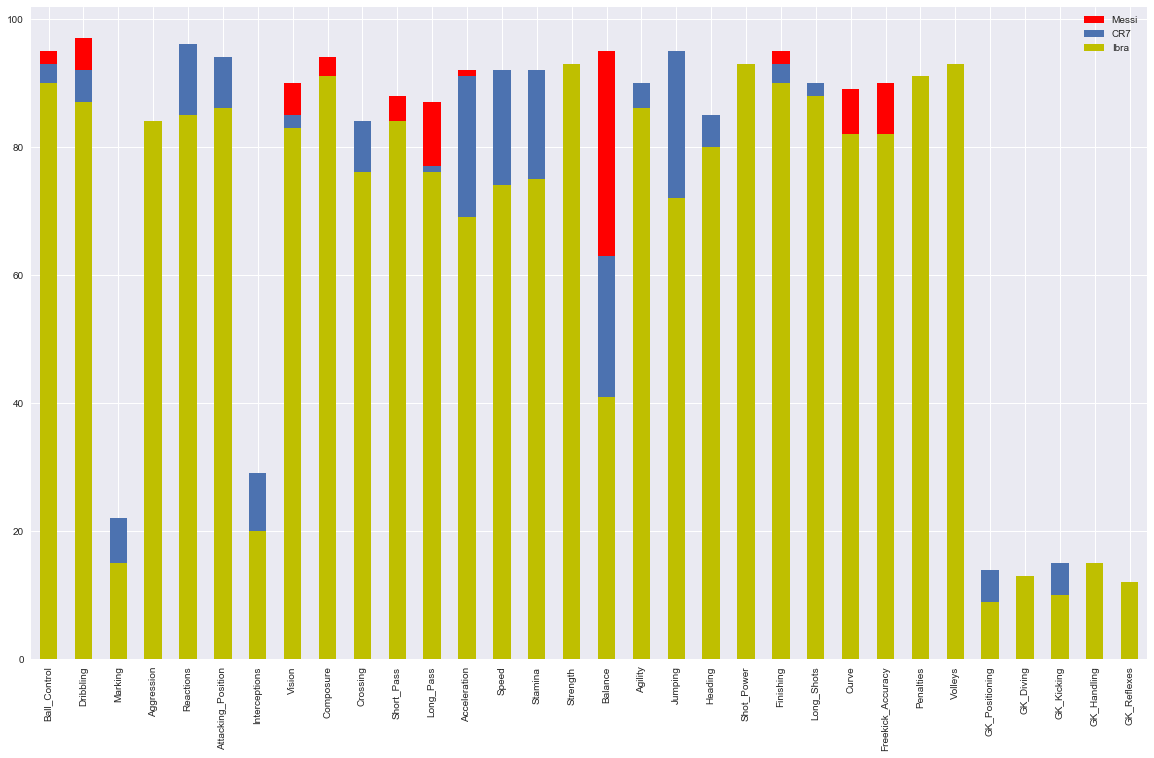

In [19]:
attributes = ['Ball_Control','Dribbling','Marking','Aggression','Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes']

players = fifa['Name'].unique().tolist()

#fifa.loc[0]

fig, ax = plt.subplots()
messi=fifa.loc[1][attributes].plot(kind='bar',color='r',label='Messi')
cr7 = fifa.loc[0][attributes].plot(kind='bar',label='CR7')
zlatan = fifa.loc[8][attributes].plot(kind='bar',color='y',label="Ibra")
ax.legend(loc='upper right')





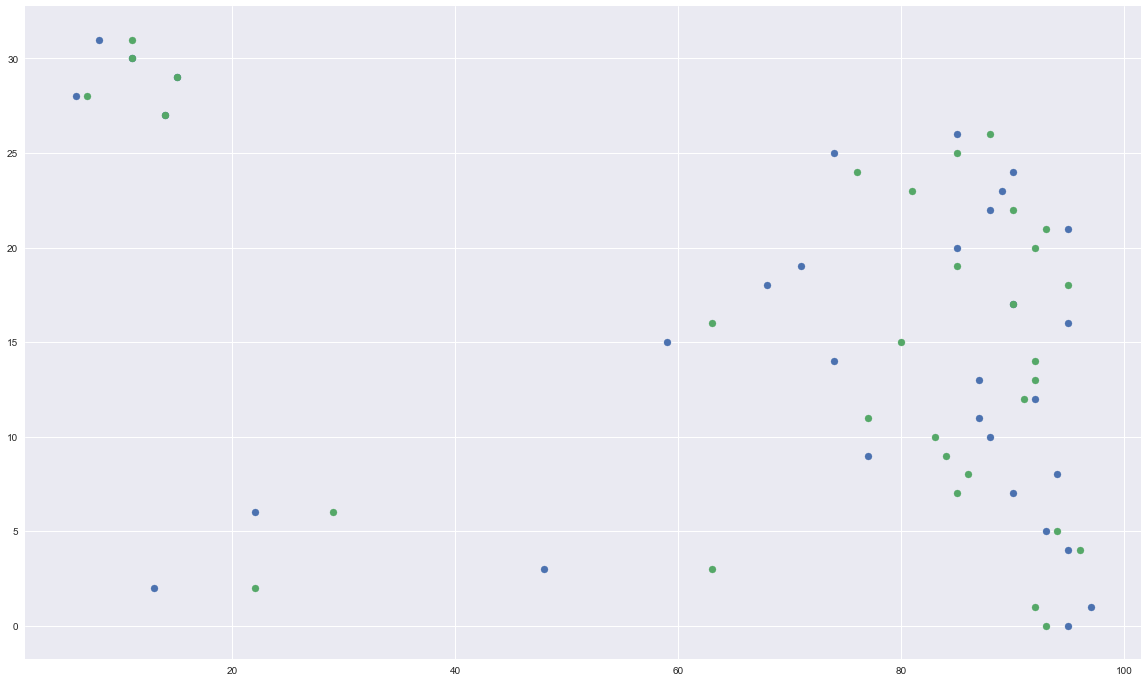

In [20]:
fig, ax = plt.subplots()

#meessi=fifa.loc[0][attributes].unique().tolist()
#print(meessi)

m10 = np.array(fifa.loc[1][attributes])
cr7 = np.array(fifa.loc[0][attributes])

time=np.arange(32)

plt.scatter(m10,time)
plt.scatter(cr7,time)


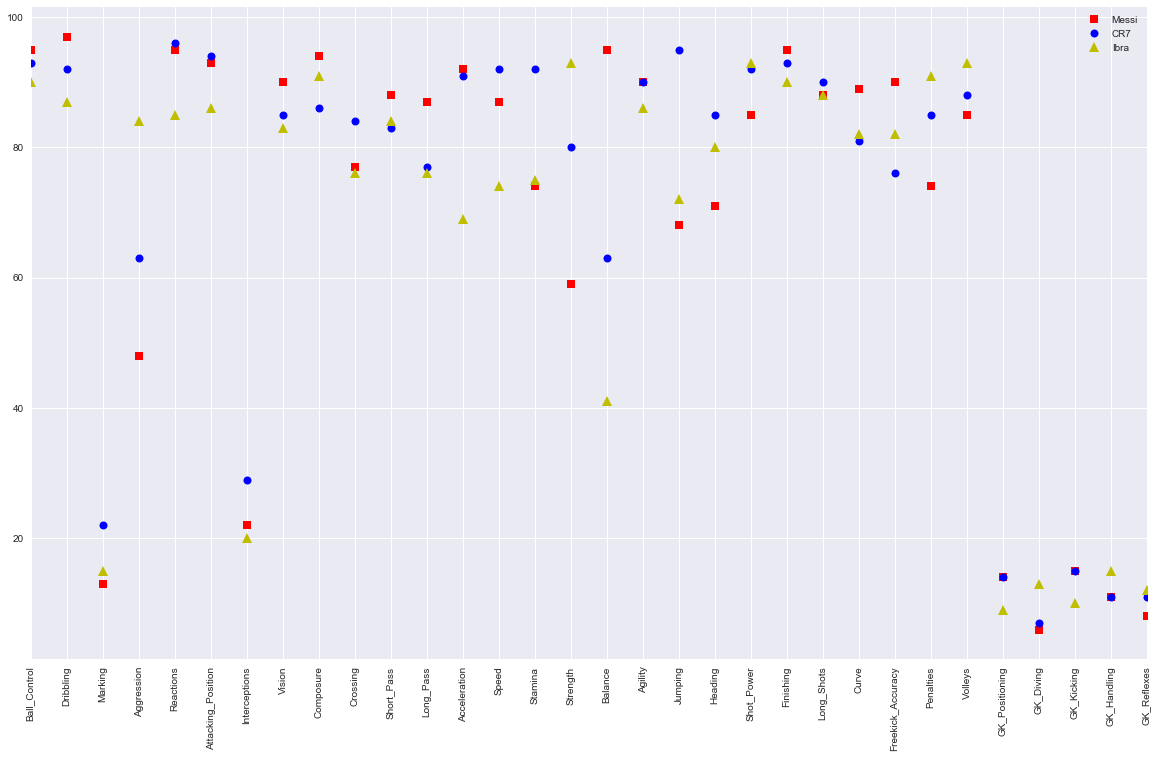

In [18]:

fig, ax = plt.subplots()
messi=fifa.loc[1][attributes].plot(color='r',label='Messi',ls='none',marker='s',ms=8)
cr7 = fifa.loc[0][attributes].plot(color='b',label='CR7',ls='none',marker='o',ms=8)
zlatan = fifa.loc[8][attributes].plot(color='y',label="Ibra",ls='none',marker='^',ms=10)
x_axis = range(len(attributes))#tamanho do eixo X , range dos valores 
ax.set_xticks(x_axis)
ax.set_xticklabels(attributes,rotation='vertical') #atribui a legenda os nomes dos vertices rotacionando para vertical 

ax.legend(loc='upper right')